In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [32]:
# Importing Liabraries And Data

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
df = pd.read_csv('/kaggle/input/social-network-ads/Social_Network_Ads.csv') #importing data by pandas
pd.set_option('Display.max_rows',400) #Display all the rows

In [35]:
df.head()#DataFrame

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [36]:
# Data Wrangling

In [37]:
df.shape #Shape of our DataFrame

(400, 5)

In [38]:
df.info() #information about our Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [39]:
df.describe() #Getting various statistical data of our DataFrame

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [40]:
df.isnull().sum() #Fortunately , there is no null values

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [41]:
df.duplicated().sum() #there is no duplicate value also

0

In [42]:
# About Age

In [43]:
print(df['Age'].median()) #median of the ages

37.0


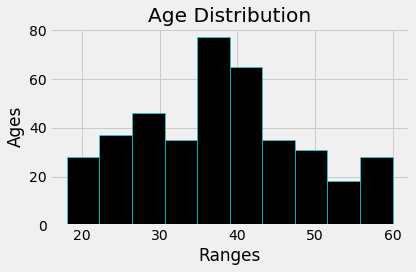

In [44]:
#Graphical Distribution of our data age
plt.style.use('fivethirtyeight')
plt.hist(df['Age'] ,color = 'black' , edgecolor = 'cyan')
plt.xlabel('Ranges')
plt.ylabel('Ages')
plt.title('Age Distribution')
plt.tight_layout()
plt.show()

In [45]:
# About EstimatedSalary

In [46]:
print(df['EstimatedSalary'].mean()) #mean of estimated salary

69742.5


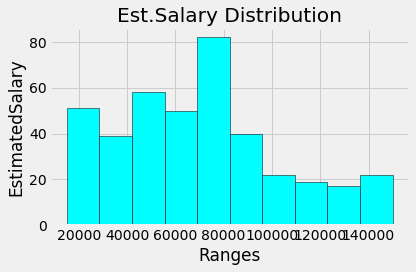

In [47]:
#Graphical Distribution of our data Estimatedsalary
plt.hist(df['EstimatedSalary'] , color = 'cyan' , edgecolor = 'k'  )
plt.xlabel('Ranges')
plt.ylabel('EstimatedSalary')
plt.title('Est.Salary Distribution')
plt.tight_layout()
plt.show()

In [48]:
# Machine Learning Section  

In [49]:
#importing liabraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

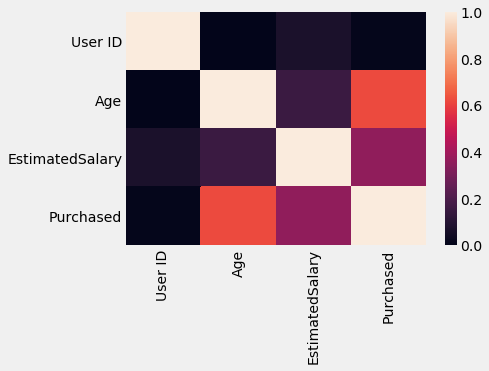

In [50]:
#Getting the heatmap
sns.heatmap(df.corr())

In [51]:
#having X and Y for Ml model 
X = df[['Age','EstimatedSalary']]
Y = df['Purchased']

In [52]:
#Using train_test_split method to splitting the data into training part and testing part for Ml
#Here test_size = 0.2 means Ml model will take only 80% of the data to train and 20% data to test
#Here random_state means it will not change the trainning and testing part after running this many times
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2 , random_state = 1)

In [53]:
log_reg = LogisticRegression() #having the logisticregreesion as variable

In [54]:
log_reg.fit(X_train , Y_train) #fitting the trainning data to use the Ml-LogisticRegression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
predictions = log_reg.predict(X_test) #Predicting the testing data

In [56]:
confusion_matrix(Y_test,predictions)
#Having a confusion matrix to know connection between actual value and Predicting value

array([[48,  0],
       [32,  0]])

In [57]:
log_reg.score(X_test,Y_test)
#Getting the score(r-squared) value..if the score is close to 1 which means our prediction is good

0.6

In [58]:
log_reg.coef_ #Getting the coefficient

array([[-3.02093172e-09, -3.03373498e-06]])

In [59]:
log_reg.intercept_ #getting the intercept

array([-2.50017226e-10])

In [60]:
# I have got the Ml model(LogisticRegression) to predict the Purchase...Thank You 